In [ ]:
# !pip install pandas scikit-learn numpy matplotlib seaborn

# Классификация

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
phone_train = pd.read_csv('data/train_classification.csv')
phone_test = pd.read_csv('data/test_classification.csv')

In [3]:
phone_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
phone_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
phone_test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [5]:
X = phone_train.drop(columns=['price_range'])
y = phone_train['price_range']

In [6]:
# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Стандартизируем данные
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
y.unique()

array([1, 2, 3, 0])

In [9]:
# Создаем и обучаем модель KNN (k ближайших соседей)
model = KNeighborsClassifier(n_neighbors=21)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=21)

In [10]:
# Делаем предсказания
y_pred = model.predict(X_test)

In [11]:
# Оцениваем модель
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[79 25  1  0]
 [28 44 17  2]
 [ 2 29 49 12]
 [ 0  3 38 71]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.75      0.74       105
           1       0.44      0.48      0.46        91
           2       0.47      0.53      0.50        92
           3       0.84      0.63      0.72       112

    accuracy                           0.61       400
   macro avg       0.62      0.60      0.60       400
weighted avg       0.63      0.61      0.61       400



In [12]:
reports = []
for i in range(1, 100):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    reports.append(classification_report(y_test, y_pred, output_dict=True))

In [ ]:
# reports

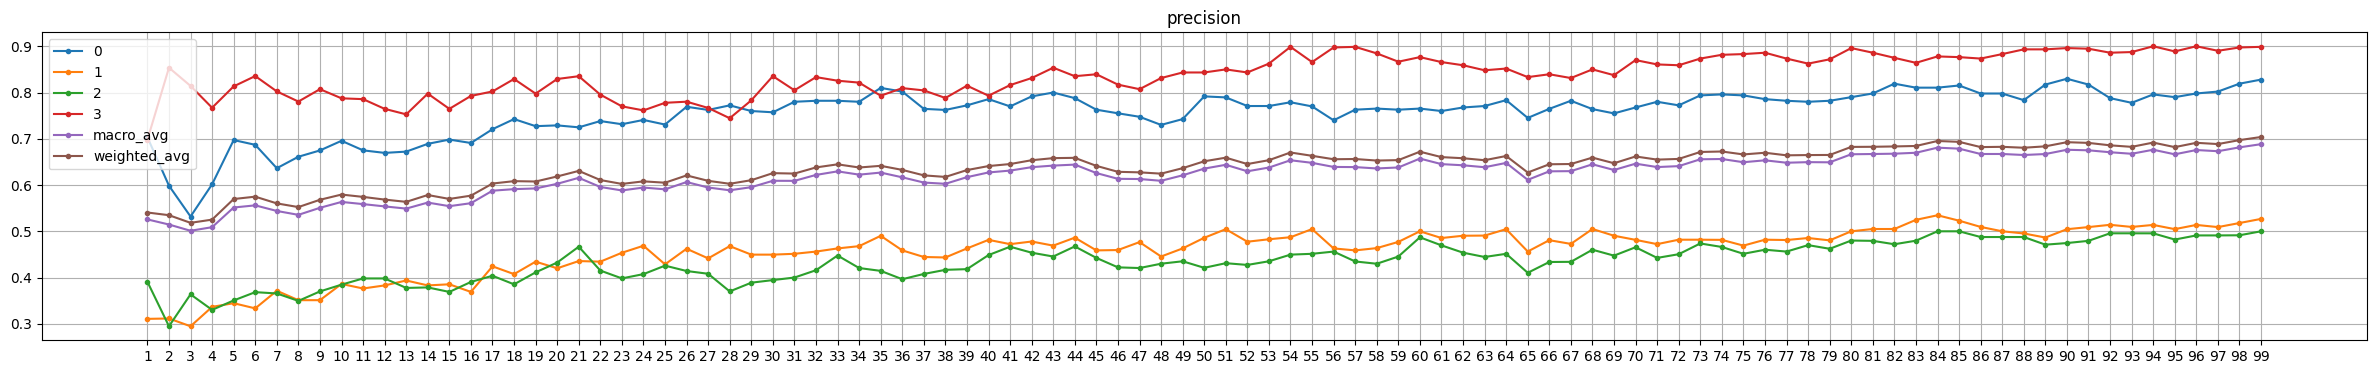

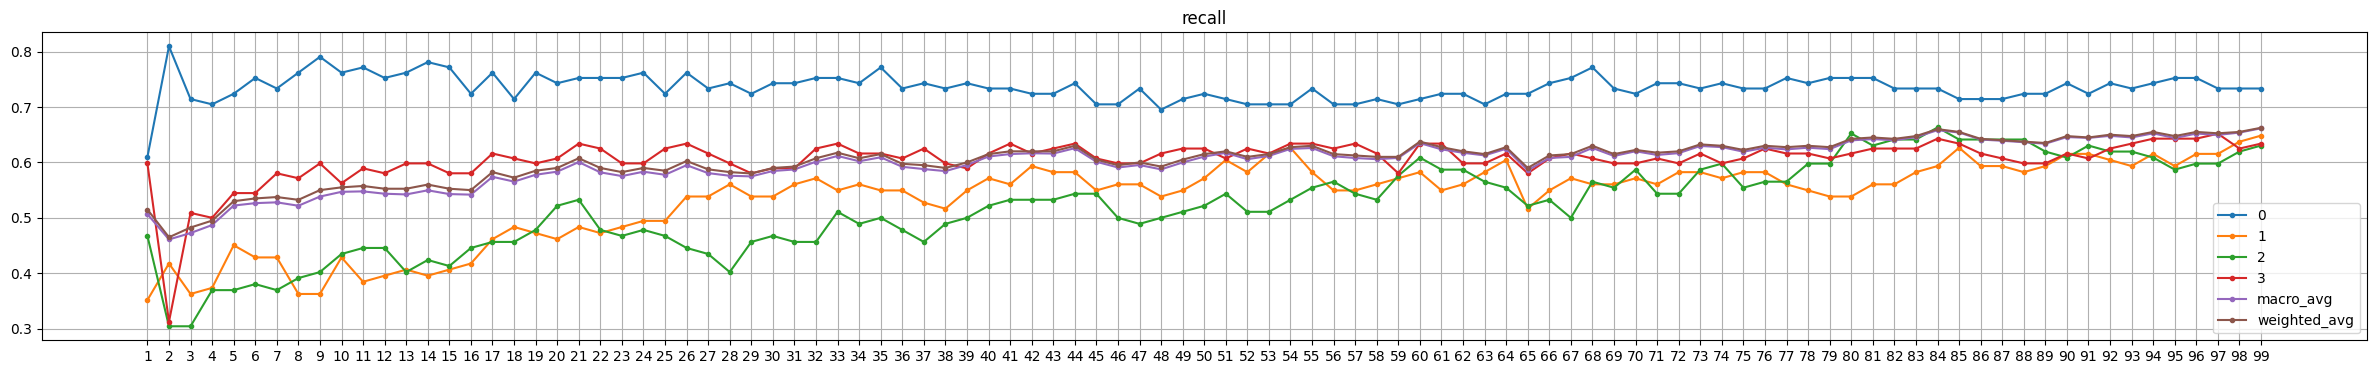

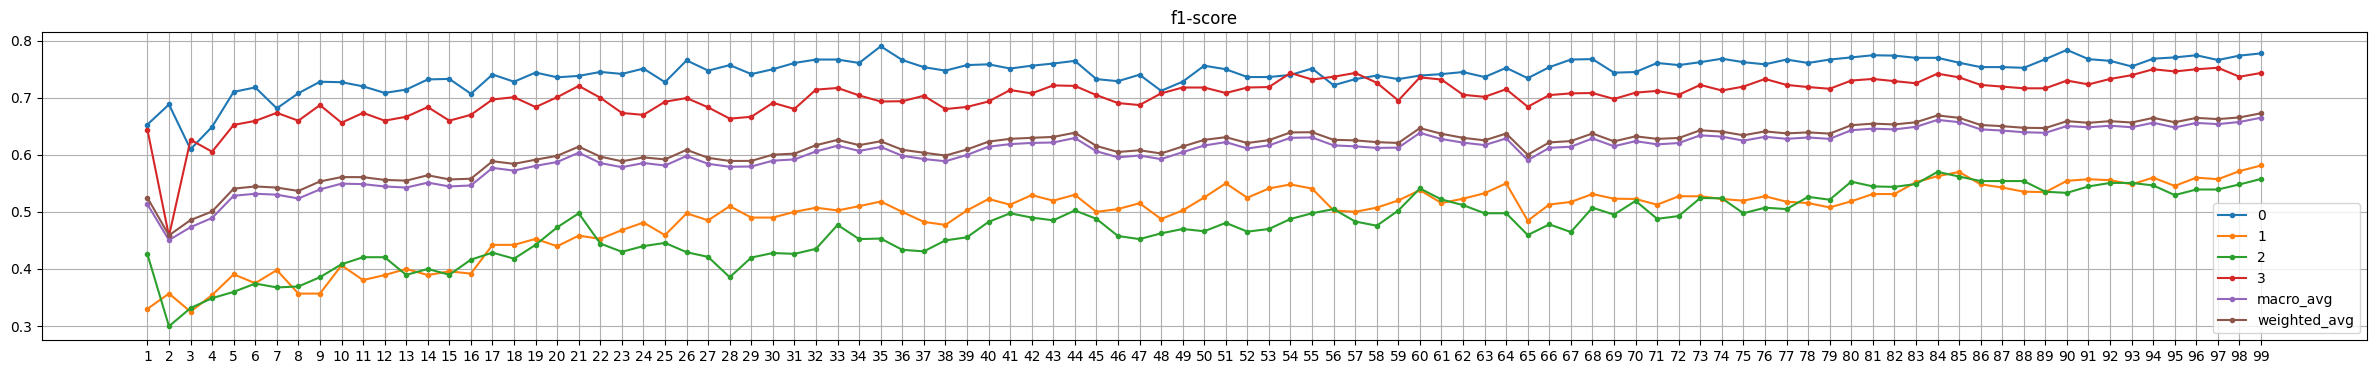

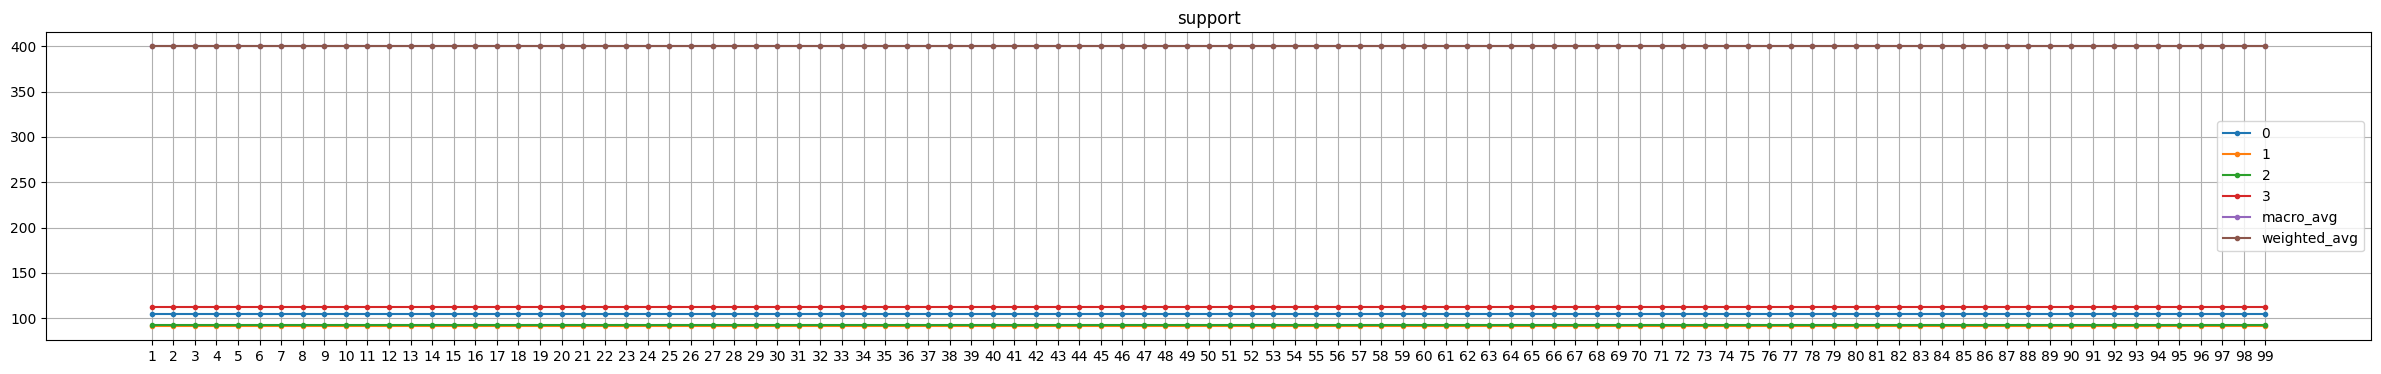

In [13]:
amount_of_classes = 4
types = ['precision', 'recall', 'f1-score', 'support']


neighbors = np.arange(1, len(reports)+1)

def draw_classification_report(type_):

    measurements = []
    for j in range(amount_of_classes):
        measurements.append([i[str(j)][type_] for i in reports])

    macro_avg = [i['macro avg'][type_] for i in reports]
    weighted_avg = [i['weighted avg'][type_] for i in reports]

    fig = plt.figure(figsize=(30, 4))
    ax = fig.add_subplot()

    for i in range(amount_of_classes):
        ax.plot(neighbors, measurements[i], marker='.', label = str(i))

    ax.plot(neighbors, macro_avg, marker='.', label = 'macro_avg')
    ax.plot(neighbors, weighted_avg, marker='.', label = 'weighted_avg')

    ax.set_title(type_)
    ax.xaxis.set_major_locator(ticker.FixedLocator(neighbors))
    ax.legend()
    ax.grid()

for i in types:
    draw_classification_report(i)



In [14]:
neighbors

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [15]:
len(reports)

99

In [16]:
matrix = confusion_matrix(y_test, y_pred)
matrix # true negatives -0, 0; false negatives- 1, 0; true positives- 1, 1, false positives - 0,1

array([[77, 26,  2,  0],
       [16, 59, 16,  0],
       [ 0, 26, 58,  8],
       [ 0,  1, 40, 71]])

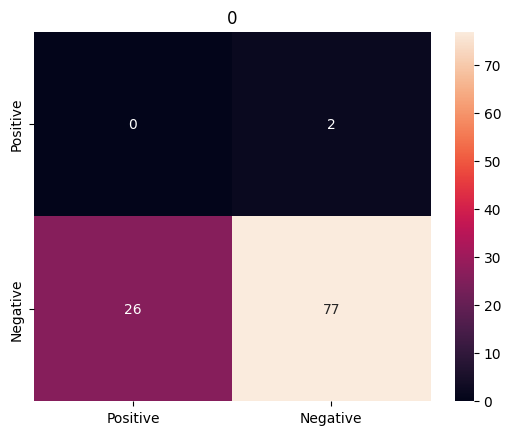

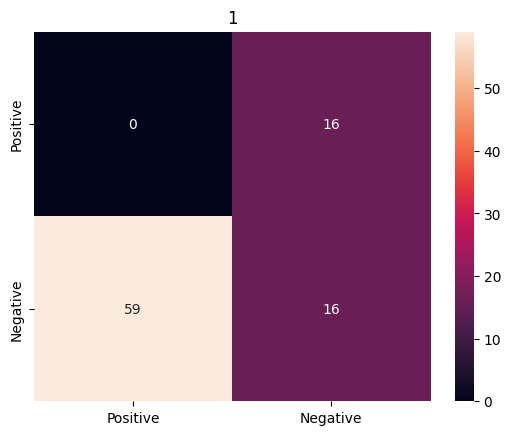

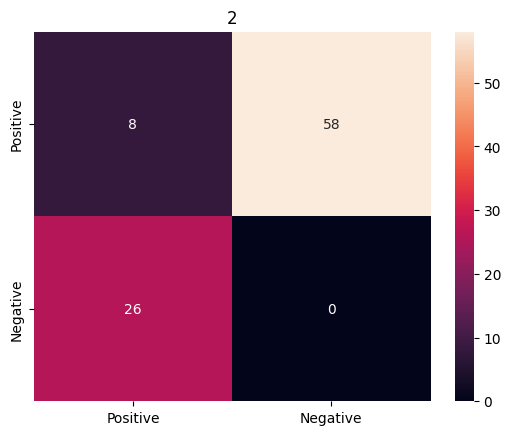

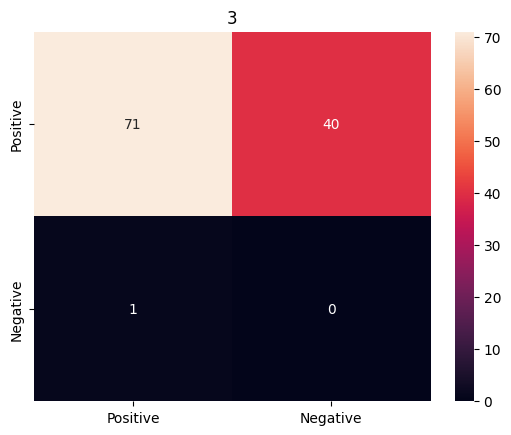

In [17]:
for i in range(amount_of_classes):
    fig = plt.figure()
    ax = fig.add_subplot()

    ax.set_title(i)
    tn, fp, fn, tp = matrix[i].ravel()
    sns.heatmap(np.array([tp, fn, fp, tn]).reshape(2, -1),
                xticklabels = ['Positive', 'Negative'],
                yticklabels = ['Positive', 'Negative'],
                annot=True)

In [ ]:
df = pd.read_csv('train.csv')

<Axes: >

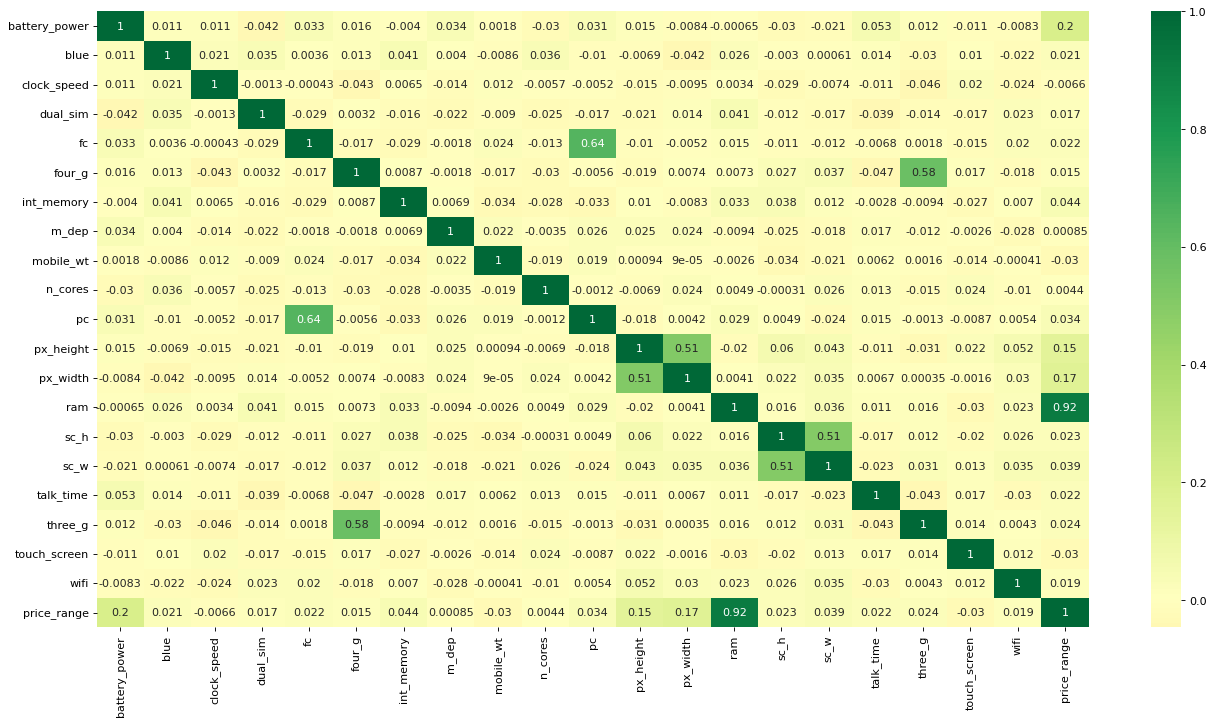

In [ ]:
plt.figure(figsize=(20,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

<Axes: xlabel='ram', ylabel='price_range'>

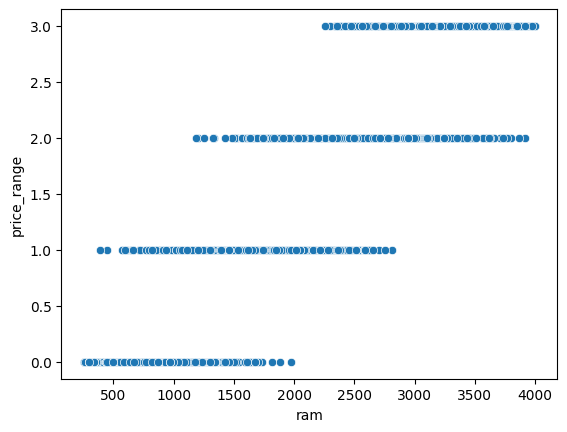

In [ ]:
sns.scatterplot(y="price_range",
                    x="ram",
                    data=df)

<Axes: xlabel='price_range', ylabel='battery_power'>

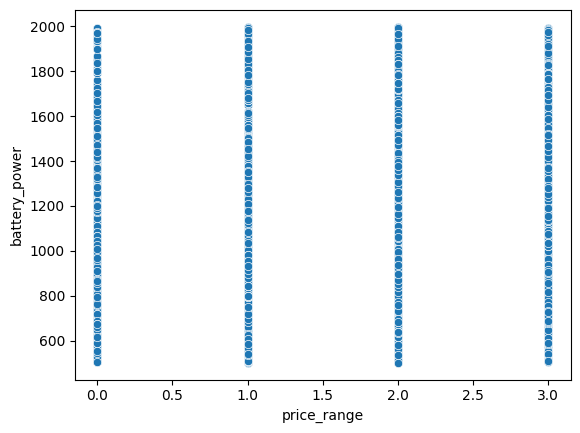

In [ ]:
sns.scatterplot(y="battery_power",
                    x="price_range",
                    data=df)

<Axes: xlabel='fc', ylabel='pc'>

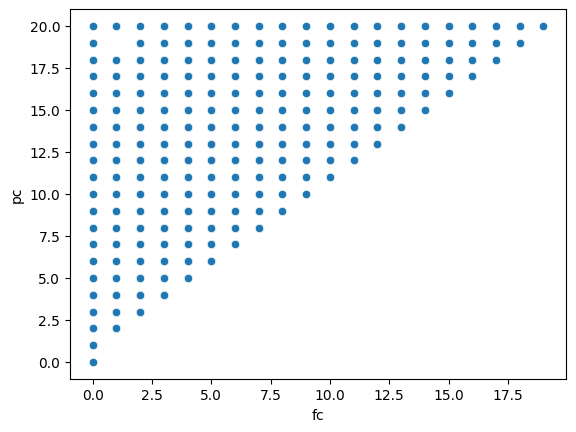

In [ ]:
sns.scatterplot(y="pc",
                    x="fc",
                    data=df)

<BarContainer object of 4 artists>

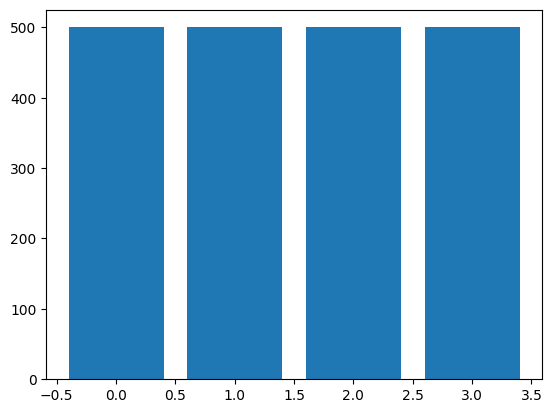

In [ ]:
data = df.groupby(by='price_range').count()
plt.bar(data.index, data['blue'])

In [ ]:
X = df[['ram', 'battery_power', 'px_height', 'px_width']]
y = df['price_range']

In [ ]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизируем данные
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = KNeighborsClassifier(n_neighbors=6)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       105
           1       0.87      0.92      0.89        91
           2       0.83      0.88      0.85        92
           3       0.97      0.88      0.93       112

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



In [ ]:
matrix = confusion_matrix(y_test, y_pred)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[100,   5,   0,   0],
       [  3,  84,   4,   0],
       [  0,   8,  81,   3],
       [  0,   0,  13,  99]])

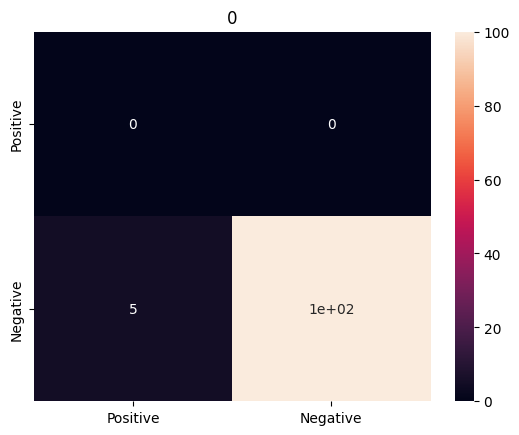

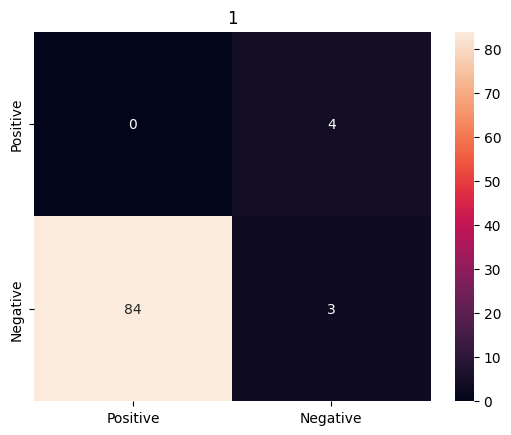

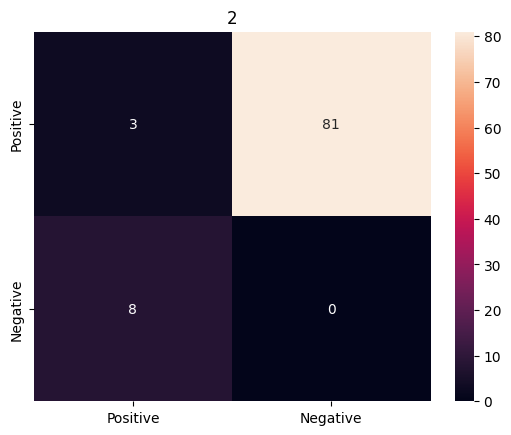

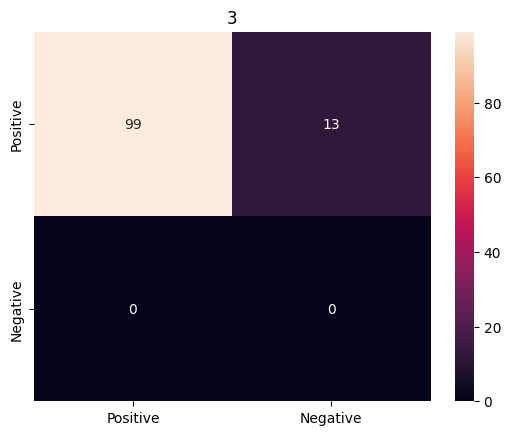

In [ ]:
for i in range(amount_of_classes):
    fig = plt.figure()
    ax = fig.add_subplot()

    ax.set_title(i)
    tn, fp, fn, tp = matrix[i].ravel()
    sns.heatmap(np.array([tp, fn, fp, tn]).reshape(2, -1),
                xticklabels = ['Positive', 'Negative'],
                yticklabels = ['Positive', 'Negative'],
                annot=True)